# Part II - (Analysis of Prosper loan data)
## by (Kosiso Aniebue)


## Investigation Overview

> Analysis of Prosper loan data focusing majorly on estimated return on loans, how long loan terms are, how much it cost to maintain a loan and effect of the annual percentage rates on the loan terms and loan amounts.

## Dataset Overview

> The dataset contains 113937 rows and 22 columns. Most of the columns are numeric but we also have categorical variables(both ordinal and nominal) and datetime variables.
However, I will be working with just 84853 rows and 11 of those columns.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosper-loan-data.csv')

loans = df.loc[:, ['Term', 'BorrowerAPR', 'IncomeRange', 'StatedMonthlyIncome', 
                   'IncomeVerifiable', 'IsBorrowerHomeowner', 'LoanOriginalAmount', 
                   'LoanOriginationQuarter', 'EstimatedReturn', 'ProsperRating (numeric)', 
                   'ProsperScore']]

loans = loans.dropna()

# Separate year into quarters
loans[['OriginationQuarter', 'OriginationYear']] = loans.LoanOriginationQuarter.str.split(" ", expand=True)

loans.drop(columns=['LoanOriginationQuarter', 'OriginationYear'], inplace=True)

# Convert IncomeRange to ordinal categorical 
ordinal_var_dict = {'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

# round up the column data on monthly income
loans['StatedMonthlyIncome'] = loans.StatedMonthlyIncome.round(2)

## Estimated Return

> Prosper projects to averagely make 5-15% return on each loan.

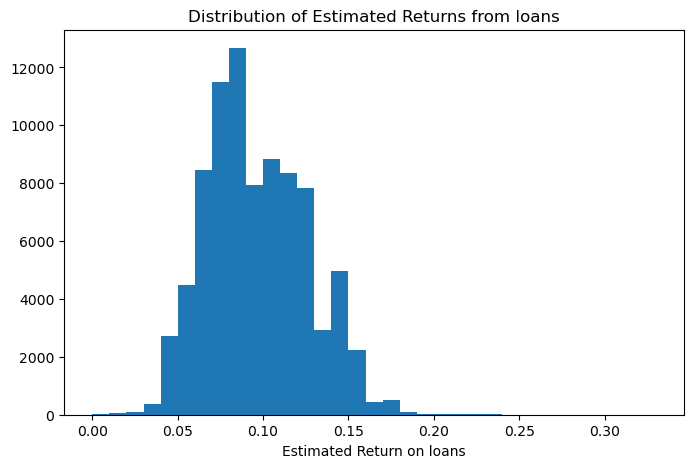

In [4]:
plt.figure(figsize=[8, 5])
bins = np.arange(0, loans.EstimatedReturn.max()+0.05, 0.01)
plt.hist(data = loans, x = 'EstimatedReturn', bins = bins);
plt.title('Distribution of Estimated Returns from loans')
plt.xlabel('Estimated Return on loans');

## Cost Of Loan

> It costs customers roughly 2.5% of borrowed amount on average to maintain a loan annually.

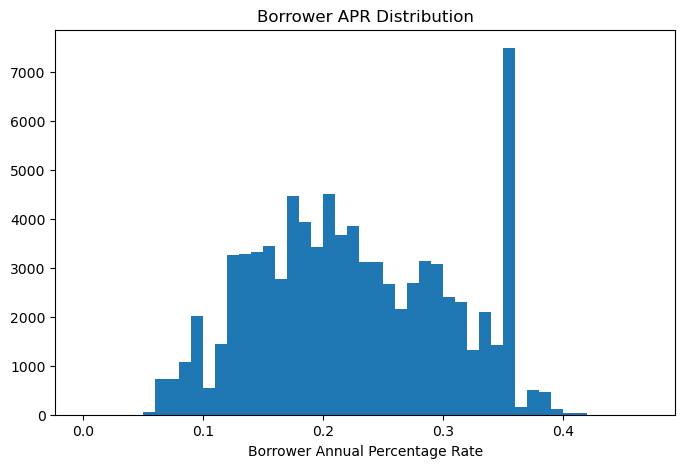

In [5]:
plt.figure(figsize=[8, 5])
bins = np.arange(0, loans.BorrowerAPR.max()+0.05, 0.01)
plt.hist(data = loans, x = 'BorrowerAPR', bins = bins);
plt.title('Borrower APR Distribution')
plt.xlabel('Borrower Annual Percentage Rate');

## Effects Of Estimated Returns and Annual Percentage Rate on Loan Amount

> Loan terms are either year (12 month) or 3 years (36 months) or 5 years (60 months) with most of the loans having a 3-year term.
Longer loan terms bring in the highest returns. Larger loans also have lesser APRs where the estimated returns are roughly around 5-15% range while the lesser loan amounts have higher APRs that are largely within 0-25% range.

Text(0, 0.5, 'Borrower Annual Percentage Interest')

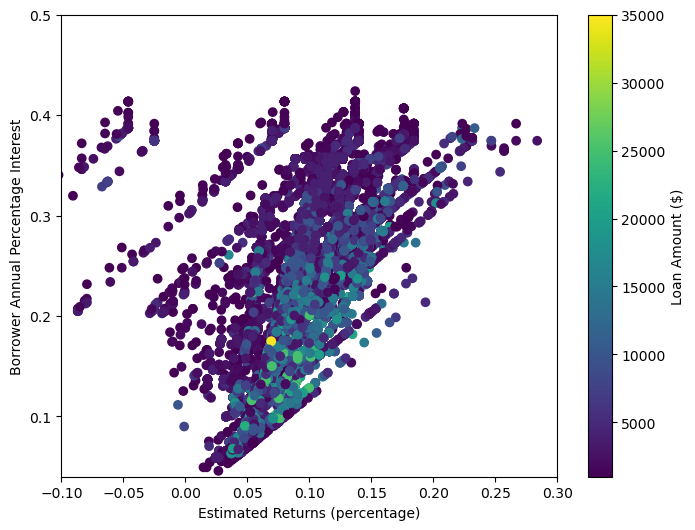

In [6]:
# Estimated return vs APR vs Loan Amount

plt.figure(figsize = [8,6])
plt.scatter(data = loans, x = 'EstimatedReturn', y = 'BorrowerAPR',c = 'LoanOriginalAmount')
plt.colorbar(label = 'Loan Amount ($)')
plt.xlim(-0.1,0.3)
plt.ylim(0.04,0.5)
plt.xlabel('Estimated Returns (percentage)')
plt.ylabel('Borrower Annual Percentage Interest')

## Seasonality Of Loans

> Most loans are taken in Q4 followed by Q1. That indicates that most loan are borrowed between October and March. Although the number of loans originating in Q4 is higher, Q1 is bigger in terms of volume. Seasoality has no effects on the loan amounts or the estimated returns

<AxesSubplot:xlabel='OriginationQuarter', ylabel='LoanOriginalAmount'>

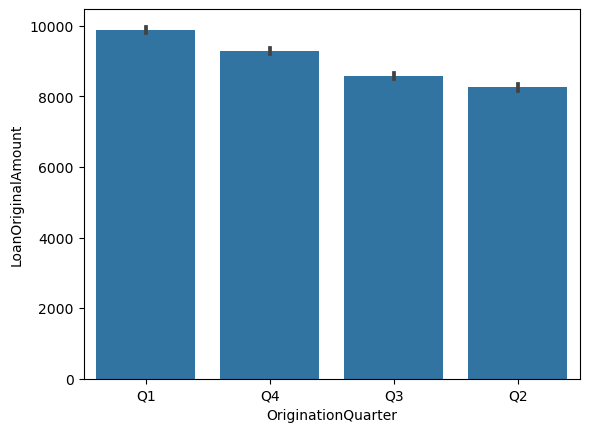

In [8]:
base_color = sb.color_palette()[0]
sb.barplot(data=loans, x='OriginationQuarter', y='LoanOriginalAmount', color=base_color)

## Effects of Prosper Ratings on Loan Amount and APR

> APR decreases with better ratings while Loan amount increases with better ratings
Having a higher Prosper rating increases the amount of loan a borrower can access and consequently lesser APR.

Text(0, 0.5, 'Borrower Annual Percentage Interest')

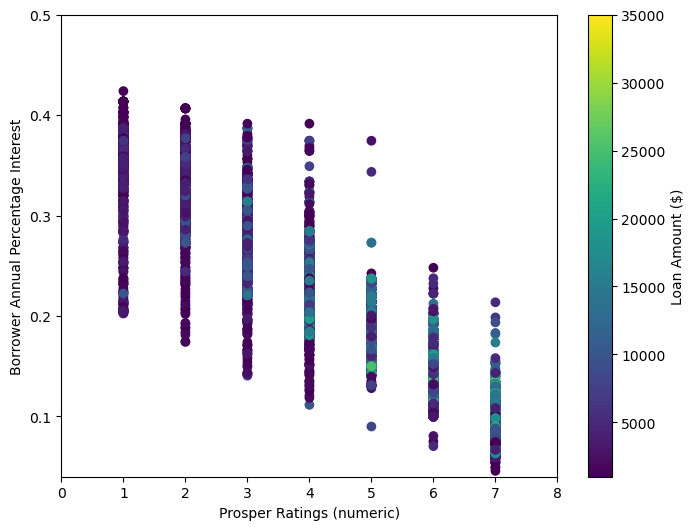

In [9]:
plt.figure(figsize = [8,6])
plt.scatter(data = loans, x = 'ProsperRating (numeric)', y = 'BorrowerAPR',c = 'LoanOriginalAmount')
plt.colorbar(label = 'Loan Amount ($)')
plt.xlim(0.0,8.0)
plt.ylim(0.04,0.5)
plt.xlabel('Prosper Ratings (numeric)')
plt.ylabel('Borrower Annual Percentage Interest')

In [1]:
!jupyter nbconvert <prosper_loans_slide_deck>.ipynb --to slides --post serve --no-input --no-prompt

/bin/bash: prosper_loans_slide_deck: No such file or directory
